In [2]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from generateData import generateData
from findClosestNeighbours import findClosestNeighbours
from spectralClustering import spectralClustering

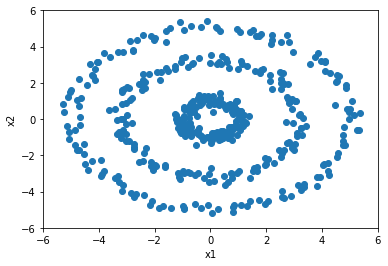

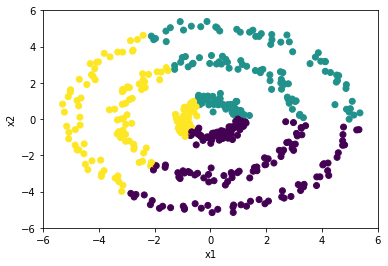

In [3]:
# Generate data
data = generateData()

# Plot data
plt.figure(1)
plt.scatter(data[:,0], data[:,1])
plt.xlabel('x1')  
plt.ylabel('x2')  
plt.ylim(-6, 6)  
plt.xlim(-6, 6) 
plt.show()

# Number of clusters
k = 3

# Cluster using kmeans
centroids, labels = kmeans2(data, k)

# Plot clustering produced by kmeans
plt.figure(2)
plt.scatter(data[:,0], data[:,1], c=labels, facecolors="none") 
plt.xlabel('x1')  
plt.ylabel('x2')  
plt.ylim(-6, 6)  
plt.xlim(-6, 6) 
plt.show()

In [4]:
# Find N closest neighbours of each data point
N = 10
closestNeighbours = findClosestNeighbours(data, N)

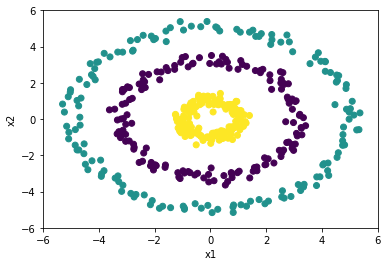

In [5]:
# Create adjacency matrix
W = zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(N):
        W[i,closestNeighbours[i,j]] = 1
        W[closestNeighbours[i,j],i] = 1

# Perform spectral clustering
labels = spectralClustering(W, k)  

# Plot clustering produced by spectral clustering
plt.figure(2)
plt.scatter(data[:,0], data[:,1], c=labels, facecolors="none") 
plt.xlabel('x1')  
plt.ylabel('x2')  
plt.ylim(-6, 6)  
plt.xlim(-6, 6) 
plt.show()